Index(['gradeVA', 'lastFUBCAVA', 'type', 'age', 'zone', 'RAPD', 'TON',
       'traumaticcataract', 'RD', 'Endophthalmitis'],
      dtype='object')


Index(['type', 'gradeVA', 'zone', 'RD', 'OTStotalscore'], dtype='object')

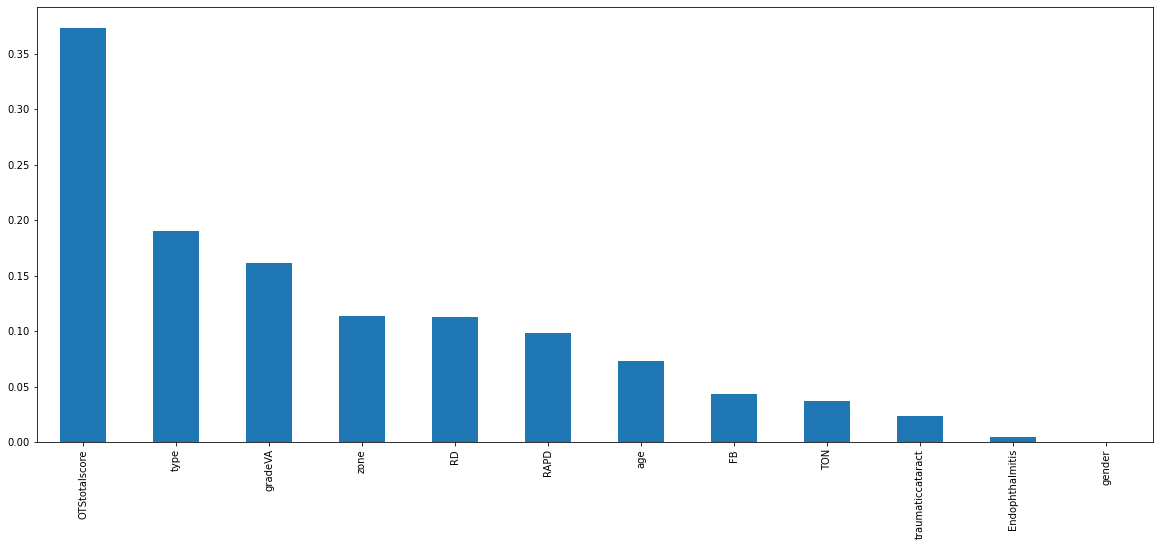

In [1]:
import pandas as pd
df=pd.read_csv('ogithreeCat.csv')
df.head()
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['lastFUBGrade'], axis=1),
    df['lastFUBGrade'],
    test_size=0.3,
    random_state=0)
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]